# Introduction to AI and Neural Networks

NOTE: Import the following statements before running any of the other cells

In [1]:
import numpy as np
import matplotlib.pyplot as plt

### Activation Functions (Slide 14)

#### Rectified Linear Unit (ReLU)

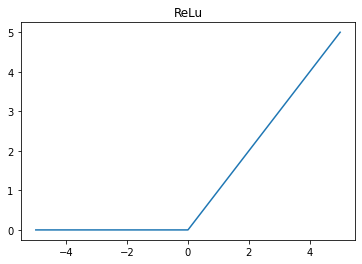

In [2]:
x = np.linspace(-5,5,1000)
y = np.maximum(0,x)
plt.plot(x,y)
plt.title("ReLu");

#### Sigmoid

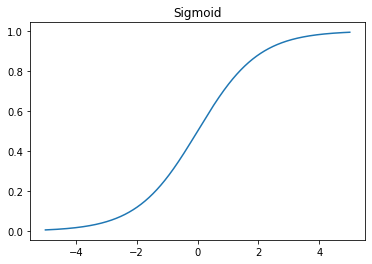

In [3]:
x = np.linspace(-5,5,1000)
y = 1/(1+np.exp(-x))
plt.plot(x,y)
plt.title("Sigmoid");

#### tanh

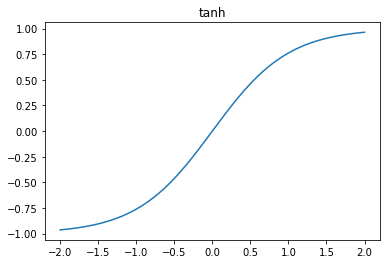

In [4]:
x = np.linspace(-2,2,200)
y = np.tanh(x)
plt.plot(x,y)
plt.title("tanh");

### Code Example: One input -  One output (Slide 17)

In [5]:
def one_input_output(x, weight_1, weight_2):
    return weight_1*x+weight_2

# Feel free to change the numbers as needed
w1 = 3
w2 = 5
x = 1 
print(f"When x={x}, the output is {one_input_output(x,w1,w2)}")

When x=1, the output is 8


### Code Example: OR Gate (Slide 18)

In [6]:
# 2 layer NN for implementation of OR gate
def linear_activation(z):
    return z

def orgate(input1, input2):
    bias = -1
    weighted_input = 2*input1 + 2*input2 + bias
    y = linear_activation(weighted_input)
    if y<0:
        return False
    else:
        return True

def boolToBinary(bool1,bool2):
    binary = []
    if bool1:
        binary.append(1)
    else:
        binary.append(0)
    if bool2:
        binary.append(1)
    else:
        binary.append(0)
    return binary[0], binary[1]

## Feel free to experiment with the inputs bool1, bool2
bool1 = True
bool2 = True
input1, input2 = boolToBinary(bool1,bool2) 
print(f"The output when the input is {bool1} and {bool2}: {orgate(input1,input2)}")

The output when the input is True and True: True


### Code example: Average of 3 Numbers (Slide 19)

In [7]:
def linear_activation(z):
    return z

def average_nn(input1, input2, input3):
    w1 = 1.0 / 3.0
    w2 = 1.0 / 3.0
    w3 = 1.0 / 3.0
    bias = 0
    z = input1 * w1 + input2 * w2 + input3 * w3 + bias
    y = linear_activation(z)
    return y

input1 = 2 # change array as need be
input2 = 3
input3 = 4
print("The average of [{},{},{}] is {})".format(input1, input2, input3, average_nn(input1, input2, input3)))

The average of [2,3,4] is 3.0)


### Code Example: Multiple input - one output + Nonlinear activation (Slide 20)

In [8]:
def param_relu(a,x):
    if x > 0:
        return x
    else:
        return a*x

def abs_difference(x1,x2):
    w1 = 1
    w2 = -1
    return param_relu(-1,w1*x1+w2*x2)

print(abs_difference(4,5))

1


### Code example: Power of multiple layers together (Slide 21)

In [9]:
def param_relu(a,x):
    if x > 0:
        return x
    else:
        return a*x

def tanh_activation(x):
    return np.tanh(x)

# 4 layer NN for computing whether absolute difference is between 1 and 3
# if between 1 and 3 outputs >0 else output <=0
def multilayer(x):

    # layer 2
    w1 = np.array([1,-1])
    b1 = 0
    weighted_input1 = np.matmul(w1,x) + b1

    # output of layer 2
    output2 = param_relu(-1, weighted_input1)

    # layer 3
    w2 = np.array([1])
    b2 = -2
    weighted_input2 = np.matmul(w2, [output2]) + b2

    # output of layer 3
    output3 = param_relu(-1, weighted_input2)

    # final layer!
    w3 = np.array([-1])
    b3 = 1
    weighted_input3 = np.matmul(w3, [output3]) + b3
    y = tanh_activation(weighted_input3)
    return y

x1 = np.random.rand()*10
x2 = np.random.rand()*10
print(f"For x1 = {x1:.5f} and x2 = {x2:.5f}, we have output {multilayer([x1,x2]):.5f}")

For x1 = 6.55281 and x2 = 2.11292, we have output -0.89367


### Code example: Average of 3 Numbers (Vectorized) (Slide 23)

In [10]:
# Simple 2 layer neural network that returns the average of a 3 numbers given as a 3x1 column vector
# this function does a "forward pass" of the input x through the 2 layer network and returns the results
def average_nn_vectorized(x):
    weights = np.array(
        [1/3, 1/3, 1/3] # a weights matrix of size 1 x 3
    )
    bias = 0

    # we perform wx + b, using np.matmul to multiply matrices w and x
    weighted_input = np.matmul(weights, x) + bias
    y = linear_activation(weighted_input)
    return y

array_input = [2, 3, 4] # change array as need be
x = np.array(array_input) # a column vector of size 3 x 1

print(f"The average is : {average_nn_vectorized(x)}")

The average is : 3.0


### Extra Example: Randomized 2 layer network

Below is an example of a neural network with randomly initialized weights.

In [11]:
np.random.seed(0)

w_2 = np.random.rand(10, 3) - 0.5 # 10 x 3 matrix
b_2 = np.random.rand() - 0.5
w_3 = np.random.rand(2, 10) - 0.5 # 2 x 10 matrix
b_3 = np.random.rand() - 0.5

def random_nn_activation(z):
    # try defining different activations here given weighted input z, they will impact the results of our neural network
    # the one given here is Relu - Rectified Linear Unit. See if you can understand what res[res < 0] = 0 means!
    res = z.copy()
    res[res < 0] = 0
    return res

# this is a random neural network with slightly more layers and does the same thing, performs a forward pass of x through the network
# Architecturally, the network has 3 layers of sizes 3, 10, 2.
# see if you can understand whats happening with the matrix multiplications and why our architecture is 3, 10, 2!
def random_nn(x):
    # typically, z represents our "weighted" input to the next layers, a is our activation
    a_1 = x

    z_2 = np.matmul(w_2, a_1) + b_2
    a_2 = random_nn_activation(z_2)

    z_3 = np.matmul(w_3, a_2) + b_3
    a_3 = random_nn_activation(z_3)

    return a_3

x = [1,2,3] # Feel free to change (1x3 vector)
y = random_nn(x) # Output is a 1x2 vector
print(f"We have input {x} give output {y}")

We have input [1, 2, 3] give output [0.68815601 0.        ]


## Practice Problems

### Square of 2 inputs

Fill in the following code cell below. Complete the neural network and activation function to calculate the square of the sum of 2 inputs.

For example,
When x1 = 1 and x2 = 1, the output is 4. (Square of 1+1)

In [ ]:
# fill in this neural network and activation function to calculate the square of the sum of 2 inputs
def activation(z):
    raise NotImplementedError

def squareNN(x1, x2):
    # this should be a simple 2 layer network, one input layer and one output layer, figure out how many neurons are in each layer, the weights, and biases!
    # This should take x1 and x2 and return the square of the sum of the 2 inputs, but obviously in neural network style!
    raise NotImplementedError

Run the tests below to verify your network works!

In [ ]:
# Your network works if you don't get any errors!
assert squareNN(1, 1) == 4
assert squareNN(-1, 1) == 0
assert squareNN(10, 2.5) == 156.25
assert squareNN(0, 0) == 0

### Average of 5 values

Fill in the following code cell below. Complete the neural network and activation function to calculate the square of the sum of 2 inputs.

For example,
When x = [1,2,3,4,5], the output is 3.

In [ ]:
# fill in this neural network and activation function to calculate the of average of 5 values using numpy and vectorization
def activation(z):
    raise NotImplementedError

def average5NN(x):
    # this should be a simple 2 layer network, one input layer and one output layer, figure out how many neurons are in each layer, the weights, and biases! 

    # This should take input column vector x and apply an appropriate weight matrix and add a bias, apply the activation and then return the result

    weights = np.array([]) # fill me in!

    bias = 100 # fix me!

    weighted_input = 0 # fill me in!

    raise NotImplementedError

Run the tests below to verify your network works!

In [ ]:
# Your network works if you don't get any errors!
assert average5NN(np.array([1, 1, 1, 1, 1])) == 1.0
assert average5NN(np.array([1, -1, 1, -1, 0])) == 0.0
assert average5NN(np.array([1, 2, 3, 4, 5])) == 3.0
assert average5NN(np.array([100, 200, 300, 400, -400])) == 1.2